In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
import jsonpickle
import json

In [12]:
#api credentials
consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''

In [14]:
authentication = tweepy.OAuthHandler(consumerKey, consumerSecret)
authentication.set_access_token(accessToken, accessTokenSecret)
authentication.secure = True
api = tweepy.API(authentication, wait_on_rate_limit = True)

In [17]:
searchQuery = '#EndSARS -filter:retweets'
#Create cursor object
tweets = tweepy.Cursor(api.search, q=searchQuery, lang='en', since='2020-10-08', tweet_mode ='extended').items(2000)
#Store Tweets in a variable
all_tweets = [tweet.full_text for tweet in tweets]

In [18]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])

In [19]:
df.head(10)

,Tweets
0,Africans are a funny breed tho.\nYou’re protes...
1,NIGERIA POLICE DONE START AGAIN \n\nStay safe ...
2,"The #EndSARS protest, the Twitter ban and the ..."
3,I still can't believe that the Nigerian milita...
4,Rip Sound Sultan \nHe was part of\n#EndSARS ht...
5,@simplyEromz Kindly provide pictorial evidence...
6,Politicians dey loot us 💔\nPolice dey shoot us...
7,@EndsarsF A very smart project brings us excit...
8,Giving out 1 Samsung S10 used by me used by me...
9,No more words! When the #Endsars protest was o...


In [22]:
import re

def clean(tweet):
    tweet = re.sub('#EndSars', 'EndSars', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub('\\n', '', tweet)
    return tweet

In [23]:
#Clean the Tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(clean)
df.head()

,Tweets,Cleaned_Tweets
0,Africans are a funny breed tho.\nYou’re protes...,Africans are a funny breed tho.You’re protesti...
1,NIGERIA POLICE DONE START AGAIN \n\nStay safe ...,NIGERIA POLICE DONE START AGAIN Stay safe guy ...
2,"The #EndSARS protest, the Twitter ban and the ...","The EndSARS protest, the Twitter ban and the J..."
3,I still can't believe that the Nigerian milita...,I still can't believe that the Nigerian milita...
4,Rip Sound Sultan \nHe was part of\n#EndSARS ht...,Rip Sound Sultan He was part ofEndSARS


In [24]:
 #Function to get the subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
#Function to get the polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#Creating columns for Subjectivity & Polarity

df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity']= df['Cleaned_Tweets'].apply(getPolarity)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,Africans are a funny breed tho.\nYou’re protes...,Africans are a funny breed tho.You’re protesti...,0.458333,0.158333
1,NIGERIA POLICE DONE START AGAIN \n\nStay safe ...,NIGERIA POLICE DONE START AGAIN Stay safe guy ...,0.500000,0.500000
2,"The #EndSARS protest, the Twitter ban and the ...","The EndSARS protest, the Twitter ban and the J...",0.066667,0.033333
3,I still can't believe that the Nigerian milita...,I still can't believe that the Nigerian milita...,0.050000,-0.150000
4,Rip Sound Sultan \nHe was part of\n#EndSARS ht...,Rip Sound Sultan He was part ofEndSARS,0.400000,0.400000


In [26]:
#Function to get the sentiment
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [27]:
#Column to Store the Sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,Africans are a funny breed tho.\nYou’re protes...,Africans are a funny breed tho.You’re protesti...,0.458333,0.158333,Positive
1,NIGERIA POLICE DONE START AGAIN \n\nStay safe ...,NIGERIA POLICE DONE START AGAIN Stay safe guy ...,0.500000,0.500000,Positive
2,"The #EndSARS protest, the Twitter ban and the ...","The EndSARS protest, the Twitter ban and the J...",0.066667,0.033333,Positive
3,I still can't believe that the Nigerian milita...,I still can't believe that the Nigerian milita...,0.050000,-0.150000,Negative
4,Rip Sound Sultan \nHe was part of\n#EndSARS ht...,Rip Sound Sultan He was part ofEndSARS,0.400000,0.400000,Positive


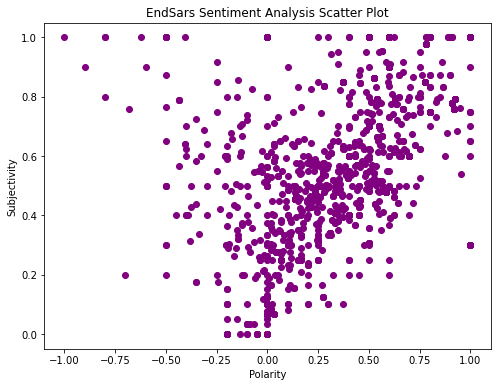

In [28]:
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('EndSars Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

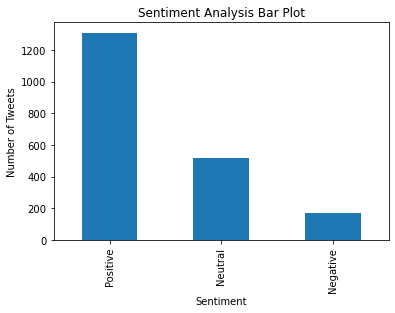

In [29]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show ()

In [32]:
from wordcloud import WordCloud

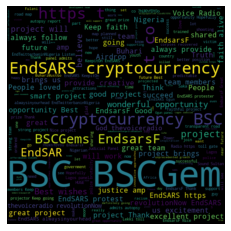

In [37]:
allWords = ' '.join( [tweets for tweets in df['Tweets']] )
wordCloud = WordCloud(width = 500, height= 500, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()